In [82]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df = pd.read_excel("ECOMM DATA.xlsx")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [84]:
#Postal Code contains null values.
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [85]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [86]:
df.drop(labels=["Postal Code","Row ID","Ship Date","Ship Mode","Segment","Region","Order Priority"],axis= 1 ,inplace = True)

## BEST SELLING ITEMS 

# we are using the "product id" because it is corresponding to "order id"

In [87]:
#first best selling product 
df["Product ID"].mode()

0    OFF-AR-10003651
Name: Product ID, dtype: object

In [88]:
df["Product ID"].value_counts()
                                                      


Product ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10003708    30
OFF-BI-10002799    30
FUR-CH-10003354    28
                   ..
FUR-FU-10002185     1
OFF-AP-10004711     1
FUR-CH-10000182     1
OFF-LA-10003297     1
OFF-AP-10002203     1
Name: count, Length: 10292, dtype: int64

In [89]:
df[df["Product ID"]== "OFF-AR-10003651"].shape[0]

35

In [90]:
df[df["Product ID"]== "OFF-AR-10003651"]["Product Name"].head(2)

8938     Sanford Pencil Sharpener, Easy-Erase
14632    Sanford Pencil Sharpener, Easy-Erase
Name: Product Name, dtype: object

In [91]:
df[df["Product ID"]== "OFF-AR-10003829"]["Product Name"].head(5)


14419        Stanley Markers, Fluorescent
14718    Boston Highlighters, Water Color
15636    Boston Highlighters, Water Color
17620        Stanley Markers, Fluorescent
19634        Stanley Markers, Fluorescent
Name: Product Name, dtype: object

In [92]:
# first best selling items are  Sanford Pencil Sharpener And Easy-Erase.
# second best selling product are  Stanley Markers, Fluorescent ,Boston Highlighters , Water Color.

## FINDING PRODUCTS GENERATING GOOD PROFIT

In [93]:
product_name_id_profit_sum = []

for product_id in df["Product ID"].unique():
    total_profit = df[df["Product ID"] == product_id]["Profit"].sum()
    Product_Name = df[df["Product ID"] == product_id]["Product Name"].iloc[0]
    product_name_id_profit_sum.append((product_id, total_profit,Product_Name))

product_name_id_profit_sum


[('TEC-AC-10003033',
  3085.0324999999984,
  'Plantronics CS510 - Over-the-Head monaural Wireless Headset System'),
 ('FUR-CH-10003950',
  -981.0674999999999,
  'Novimex Executive Leather Armchair, Black'),
 ('TEC-PH-10004664', 5455.948199999998, 'Nokia Smart Phone, with Caller ID'),
 ('TEC-PH-10004583', -270.43500000000006, 'Motorola Smart Phone, Cordless'),
 ('TEC-SHA-10000501', 311.52, 'Sharp Wireless Fax, High-Speed'),
 ('TEC-PH-10000030',
  3638.2740000000003,
  'Samsung Smart Phone, with Caller ID'),
 ('FUR-CH-10004050', 847.26, 'Novimex Executive Leather Armchair, Adjustable'),
 ('FUR-TA-10002958',
  140.46559999999874,
  'Chromcraft Conference Table, Fully Assembled'),
 ('OFF-BI-10003527',
  7753.039000000001,
  'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
 ('FUR-TA-10000198',
  -2876.1156,
  'Chromcraft Bull-Nose Wood Oval Conference Tables & Bases'),
 ('OFF-SU-10002881',
  -1299.1835999999998,
  'Martin Yale Chadless Opener Electric Letter O

In [94]:
df1 = pd.DataFrame(product_name_id_profit_sum, columns=['product ID', 'profit',"Product_Name"])

In [95]:
df1.head(4)

,product ID,profit,Product_Name
0,TEC-AC-10003033,3085.0325,Plantronics CS510 - Over-the-Head monaural Wir...
1,FUR-CH-10003950,-981.0675,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-10004664,5455.9482,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-10004583,-270.4350,"Motorola Smart Phone, Cordless"


DATA FRAME "DF1" SHOWS THE PRODUCT NAME WITH PRODUCT ID IN SORTED MANNER WHERE WE CAN EASILY VISUALIZE PRODUCTS WHICH ARE GENERATING GOOD PROFIT. 

In [96]:
df1 = df1.sort_values(by="profit", ascending=False,ignore_index=True)
df1

,product ID,profit,Product_Name
0,TEC-CO-10004722,25199.9280,Canon imageCLASS 2200 Advanced Copier
1,OFF-AP-10004512,10345.5840,"Hoover Stove, Red"
2,TEC-PH-10004823,8121.4800,"Nokia Smart Phone, Full Size"
3,OFF-BI-10003527,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...
4,TEC-CO-10001449,6983.8836,Hewlett Packard LaserJet 3310 Copier
...,...,...,...
10287,TEC-MOT-10003050,-3998.6820,"Motorola Smart Phone, Cordless"
10288,TEC-PH-10002991,-4574.6439,"Apple Smart Phone, Full Size"
10289,TEC-MA-10000822,-4589.9730,Lexmark MX611dhe Monochrome Laser Printer
10290,OFF-AP-10001623,-4958.1630,"Hoover Stove, White"


In [97]:
df.head(3)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63
2,IN-2013-71249,2013-10-17,CR-12730,Craig Reiter,Brisbane,Queensland,Australia,APAC,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49


# MONTHLY SALE

In [98]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [99]:
df.head(2)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,YearMonth
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,2012-07
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,2013-02


In [100]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

In [101]:
monthly_sales.head(5)

,YearMonth,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


# TOP 10 CUSTOMERS (WE CAN USE THIS TO GIVE THEM DISCOUNT)

In [102]:
customer_order_counts = df.groupby("Customer Name")["Order ID"].count().reset_index()

In [103]:
customer_order_counts.columns = ['Customer Name', 'Order Count']

In [104]:
customer_order_counts = customer_order_counts.sort_values(by="Order Count", ascending=False,ignore_index=True)

In [105]:
customer_order_counts.head(10)

,Customer Name,Order Count
0,Muhammed Yedwab,108
1,Steven Ward,106
2,Gary Hwang,102
3,Patrick O'Brill,102
4,Bill Eplett,102
5,Harry Greene,101
6,Eric Murdock,100
7,Art Ferguson,98
8,Brosina Hoffman,97
9,Bart Watters,96


In [106]:
top_20_customer_order_counts = customer_order_counts.head(20)

#   DATA VISUALIZATION 

In [107]:
top_10_df = df1.head(10)

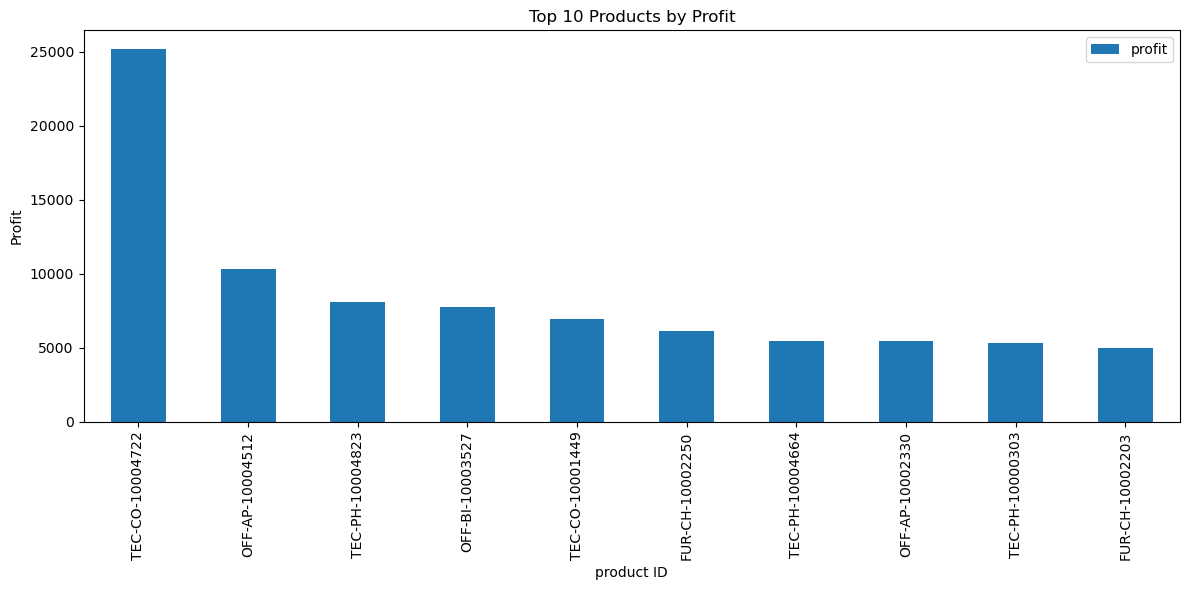

In [108]:
top_10_df.plot(x='product ID', y='profit', kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Top 10 Products by Profit')
plt.xlabel('product ID')
plt.ylabel('Profit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

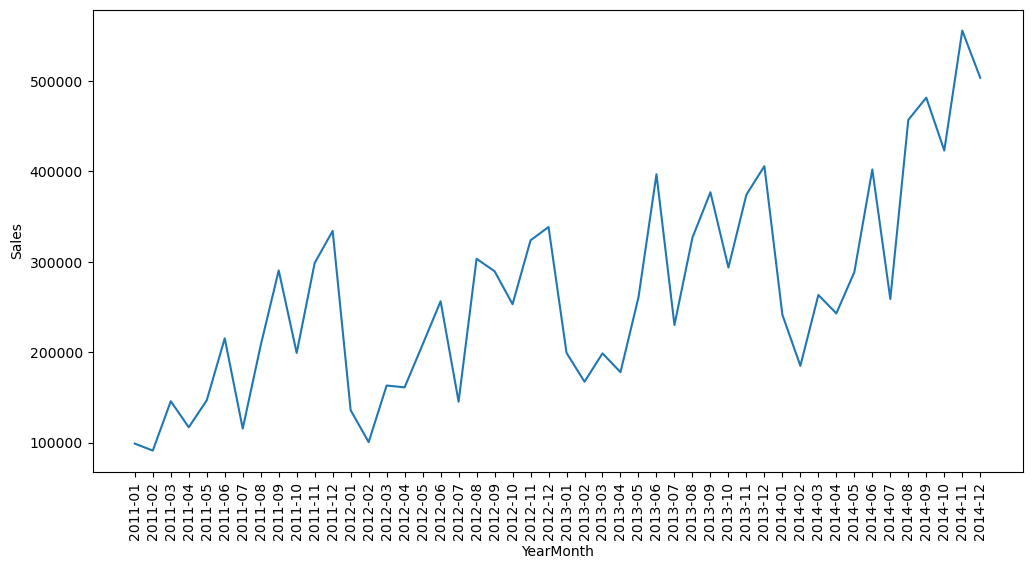

In [109]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Sales',data=monthly_sales)
plt.xticks(rotation=90)
plt.show()


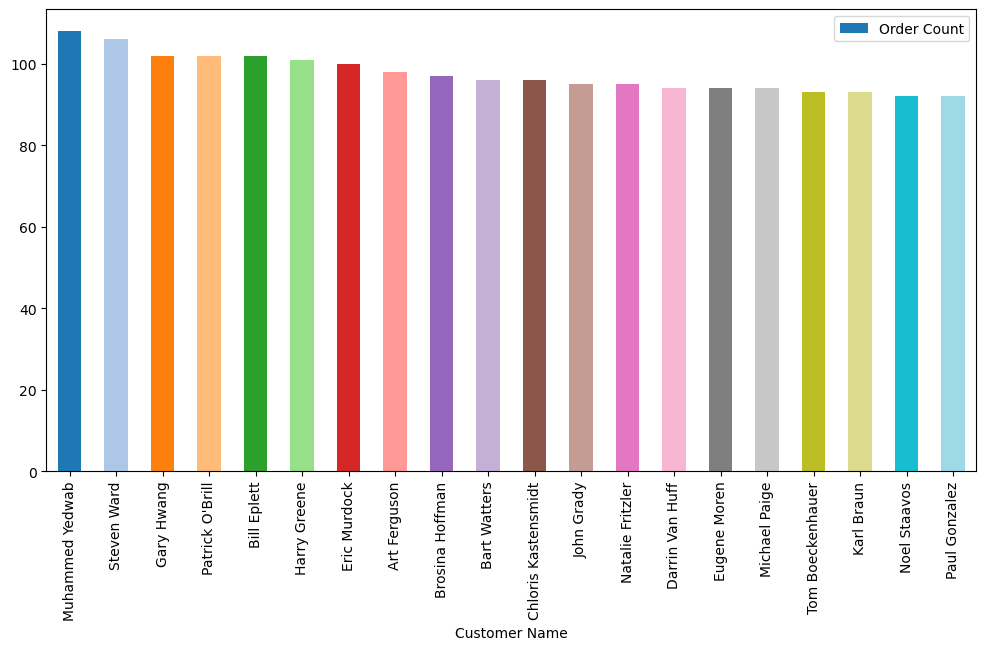

In [110]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 
          'gray', 'olive', 'lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'gold', 'darkblue', 'darkgreen', 'darkred']

colors = plt.cm.tab20.colors
top_20_customer_order_counts.head(20).plot(x='Customer Name', y='Order Count', kind='bar',color=colors, figsize=(12, 6))
plt.show()


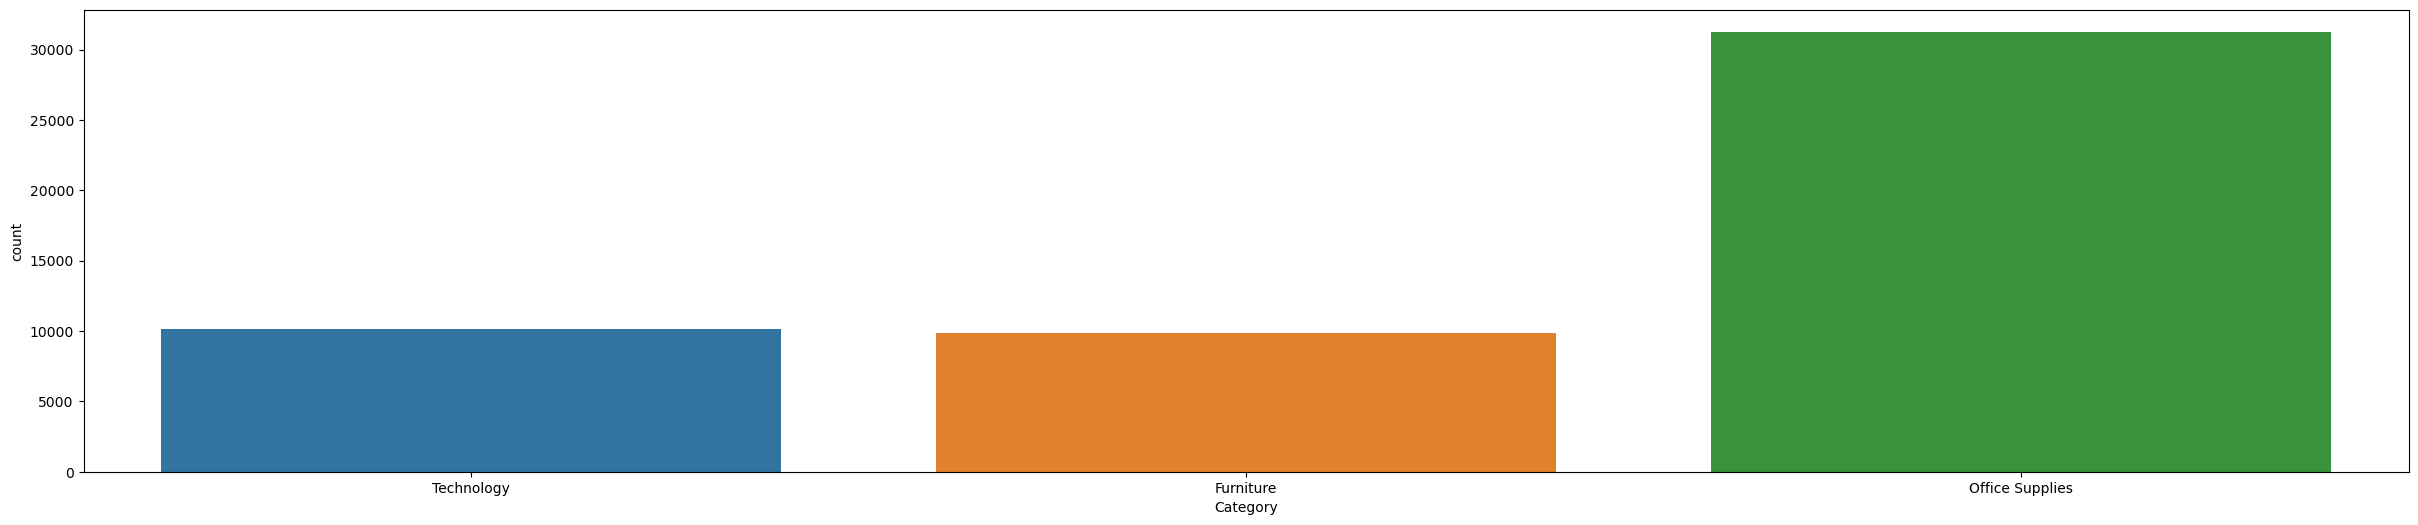

In [111]:
plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=df)
plt.show()


In [112]:
df.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Customer Name', 'City',
       'State', 'Country', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'YearMonth'],
      dtype='object')

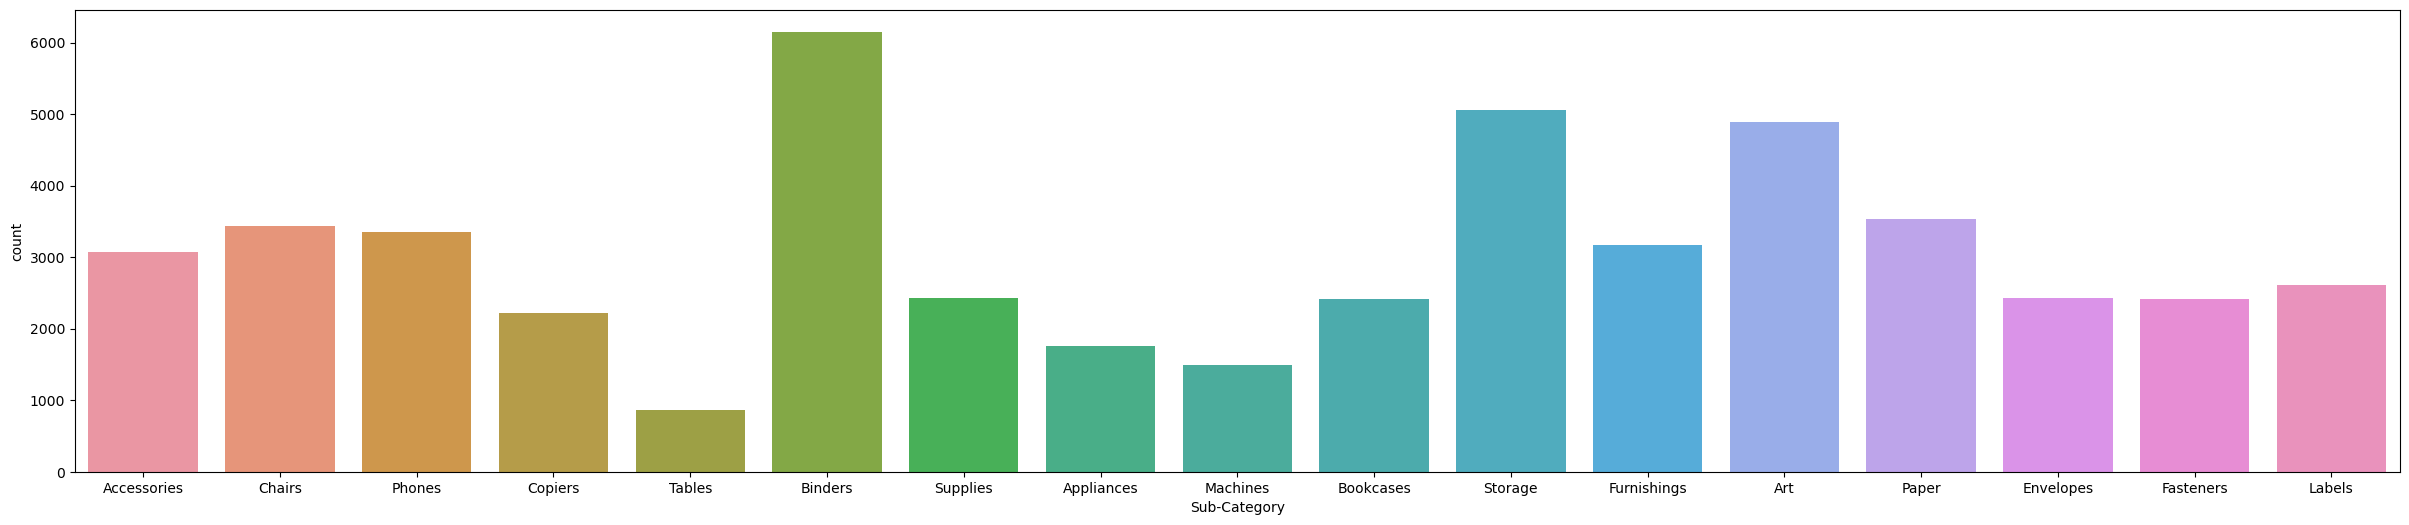

In [113]:
plt.figure(figsize=(30,6))
sns.countplot(x='Sub-Category', data=df)
plt.show()


In [114]:
df.head(5)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,YearMonth
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,2012-07
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,2013-02
2,IN-2013-71249,2013-10-17,CR-12730,Craig Reiter,Brisbane,Queensland,Australia,APAC,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,2013-10
3,ES-2013-1579342,2013-01-28,KM-16375,Katherine Murray,Berlin,Berlin,Germany,EU,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,2013-01
4,SG-2013-4320,2013-11-05,RH-9495,Rick Hansen,Dakar,Dakar,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,2013-11


In [115]:
df['Order ID_num'] = df['Order ID'].str.extract('(\d+)') # captures numerical part
df['Order ID_cat'] = df['Order ID'].str[0] # captures the first letter

df['Customer ID_num'] = df['Customer ID'].str.extract('(\d+)') # captures numerical part
df['Customer ID_cat'] = df['Customer ID'].str[0] # captures the first lette

df['Product ID_num'] = df['Product ID'].str.extract('(\d+)') # captures numerical part
df['Product ID_cat'] = df['Product ID'].str[0] # captures the first lette
df.head(3)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,...,Discount,Profit,Shipping Cost,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,...,0.0,762.1845,933.57,2012-07,2012,C,19495,R,10003033,T
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,...,0.1,-288.7650,923.63,2013-02,2013,I,16210,J,10003950,F
2,IN-2013-71249,2013-10-17,CR-12730,Craig Reiter,Brisbane,Queensland,Australia,APAC,TEC-PH-10004664,Technology,...,0.1,919.9710,915.49,2013-10,2013,I,12730,C,10004664,T


In [142]:
df.drop(columns=["Order ID", "Customer ID", "Product ID"], inplace=True)


In [143]:
df["Product Name"] = df["Product Name"].str.lower()

In [144]:
df["Product Name"]

0        plantronics cs510 - over-the-head monaural wir...
1                novimex executive leather armchair, black
2                        nokia smart phone, with caller id
3                           motorola smart phone, cordless
4                           sharp wireless fax, high-speed
                               ...                        
51285                        advantus thumb tacks, 12 pack
51286    hoover replacement belt for commercial guardsm...
51287         #10- 4 1/8" x 9 1/2" security-tint envelopes
51288                              acco index tab, economy
51289              eaton computer printout paper, 8.5 x 11
Name: Product Name, Length: 51290, dtype: object

In [145]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [146]:
exclude = string.punctuation


In [147]:
def remove_punc1(text):
    return text.translate(str.maketrans("","",exclude))

In [148]:
df["Product Name"] = df["Product Name"].apply(remove_punc1)

In [149]:
df["Product Name"]

0        plantronics cs510  overthehead monaural wirele...
1                 novimex executive leather armchair black
2                         nokia smart phone with caller id
3                            motorola smart phone cordless
4                             sharp wireless fax highspeed
                               ...                        
51285                         advantus thumb tacks 12 pack
51286    hoover replacement belt for commercial guardsm...
51287                10 4 18 x 9 12 securitytint envelopes
51288                               acco index tab economy
51289                eaton computer printout paper 85 x 11
Name: Product Name, Length: 51290, dtype: object

In [150]:
import re
def remove_dimensions(name):
    
    name = re.sub(r'\d+([ ]*\d*[\/]?\d*)?[ ]*[\'"]?[ ]*[wdh]?[ ]*x[ ]*\d+([ ]*\d*[\/]?\d*)?[ ]*[\'"]?[ ]*[wdh]?', '', name)
    
    
    name = re.sub(r'\s+', ' ', name).strip()
    return name



In [151]:

df['Product Name'] = df['Product Name'].apply(remove_dimensions)

In [152]:
df["Product Name"].sample(10)

27000                      office star rocking chair black
47534       smead shipping labels laser printer compatible
10824    white dual perf computer printout paper 2700 s...
21828                       kraft manila envelope recycled
50594                    jiffy business envelopes recycled
36023                               advantus staples metal
24193                         fellowes shelving industrial
38869     recycled desk saver line while you were out book
20696          square ring data binders rigid 75 pt covers
27650                      binney smith canvas water color
Name: Product Name, dtype: object

In [153]:
df.head(3)

,Order Date,Customer Name,City,State,Country,Market,Category,Sub-Category,Product Name,Sales,...,Discount,Profit,Shipping Cost,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,2012-07-31,Rick Hansen,New York City,New York,United States,US,Technology,Accessories,plantronics cs510 overthehead monaural wireles...,2309.650,...,0.0,762.1845,933.57,2012-07,2012,C,19495,R,10003033,T
1,2013-02-05,Justin Ritter,Wollongong,New South Wales,Australia,APAC,Furniture,Chairs,novimex executive leather armchair black,3709.395,...,0.1,-288.7650,923.63,2013-02,2013,I,16210,J,10003950,F
2,2013-10-17,Craig Reiter,Brisbane,Queensland,Australia,APAC,Technology,Phones,nokia smart phone with caller id,5175.171,...,0.1,919.9710,915.49,2013-10,2013,I,12730,C,10004664,T


In [154]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jazzy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
df['Product Name Sentences'] = df['Product Name'].apply(sent_tokenize)

In [156]:
df.head(5)

,Order Date,Customer Name,City,State,Country,Market,Category,Sub-Category,Product Name,Sales,...,Profit,Shipping Cost,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat,Product Name Sentences
0,2012-07-31,Rick Hansen,New York City,New York,United States,US,Technology,Accessories,plantronics cs510 overthehead monaural wireles...,2309.650,...,762.1845,933.57,2012-07,2012,C,19495,R,10003033,T,[plantronics cs510 overthehead monaural wirele...
1,2013-02-05,Justin Ritter,Wollongong,New South Wales,Australia,APAC,Furniture,Chairs,novimex executive leather armchair black,3709.395,...,-288.7650,923.63,2013-02,2013,I,16210,J,10003950,F,[novimex executive leather armchair black]
2,2013-10-17,Craig Reiter,Brisbane,Queensland,Australia,APAC,Technology,Phones,nokia smart phone with caller id,5175.171,...,919.9710,915.49,2013-10,2013,I,12730,C,10004664,T,[nokia smart phone with caller id]
3,2013-01-28,Katherine Murray,Berlin,Berlin,Germany,EU,Technology,Phones,motorola smart phone cordless,2892.510,...,-96.5400,910.16,2013-01,2013,E,16375,K,10004583,T,[motorola smart phone cordless]
4,2013-11-05,Rick Hansen,Dakar,Dakar,Senegal,Africa,Technology,Copiers,sharp wireless fax highspeed,2832.960,...,311.5200,903.04,2013-11,2013,S,9495,R,10000501,T,[sharp wireless fax highspeed]


In [157]:
df['Product Name Sentences']

0        [plantronics cs510 overthehead monaural wirele...
1               [novimex executive leather armchair black]
2                       [nokia smart phone with caller id]
3                          [motorola smart phone cordless]
4                           [sharp wireless fax highspeed]
                               ...                        
51285                       [advantus thumb tacks 12 pack]
51286    [hoover replacement belt for commercial guards...
51287                          [10 securitytint envelopes]
51288                             [acco index tab economy]
51289                      [eaton computer printout paper]
Name: Product Name Sentences, Length: 51290, dtype: object

In [158]:
df.head(4)

,Order Date,Customer Name,City,State,Country,Market,Category,Sub-Category,Product Name,Sales,...,Profit,Shipping Cost,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat,Product Name Sentences
0,2012-07-31,Rick Hansen,New York City,New York,United States,US,Technology,Accessories,plantronics cs510 overthehead monaural wireles...,2309.650,...,762.1845,933.57,2012-07,2012,C,19495,R,10003033,T,[plantronics cs510 overthehead monaural wirele...
1,2013-02-05,Justin Ritter,Wollongong,New South Wales,Australia,APAC,Furniture,Chairs,novimex executive leather armchair black,3709.395,...,-288.7650,923.63,2013-02,2013,I,16210,J,10003950,F,[novimex executive leather armchair black]
2,2013-10-17,Craig Reiter,Brisbane,Queensland,Australia,APAC,Technology,Phones,nokia smart phone with caller id,5175.171,...,919.9710,915.49,2013-10,2013,I,12730,C,10004664,T,[nokia smart phone with caller id]
3,2013-01-28,Katherine Murray,Berlin,Berlin,Germany,EU,Technology,Phones,motorola smart phone cordless,2892.510,...,-96.5400,910.16,2013-01,2013,E,16375,K,10004583,T,[motorola smart phone cordless]


In [159]:
df.drop(columns=["Product Name"],inplace=True)


In [161]:
df.head()

,Order Date,Customer Name,City,State,Country,Market,Category,Sub-Category,Sales,Quantity,...,Profit,Shipping Cost,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat,Product Name Sentences
0,2012-07-31,Rick Hansen,New York City,New York,United States,US,Technology,Accessories,2309.650,7,...,762.1845,933.57,2012-07,2012,C,19495,R,10003033,T,[plantronics cs510 overthehead monaural wirele...
1,2013-02-05,Justin Ritter,Wollongong,New South Wales,Australia,APAC,Furniture,Chairs,3709.395,9,...,-288.7650,923.63,2013-02,2013,I,16210,J,10003950,F,[novimex executive leather armchair black]
2,2013-10-17,Craig Reiter,Brisbane,Queensland,Australia,APAC,Technology,Phones,5175.171,9,...,919.9710,915.49,2013-10,2013,I,12730,C,10004664,T,[nokia smart phone with caller id]
3,2013-01-28,Katherine Murray,Berlin,Berlin,Germany,EU,Technology,Phones,2892.510,5,...,-96.5400,910.16,2013-01,2013,E,16375,K,10004583,T,[motorola smart phone cordless]
4,2013-11-05,Rick Hansen,Dakar,Dakar,Senegal,Africa,Technology,Copiers,2832.960,8,...,311.5200,903.04,2013-11,2013,S,9495,R,10000501,T,[sharp wireless fax highspeed]
